In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_points, plot_decision_boundary

In [2]:
x = np.array([[0,0],[0,1],[1,0],[1,1]])

In [3]:
y_nand = np.array([1,1,1,0])
y_nor = np.array([1,0,0,0])
y_xor = np.array([0,1,1,0])
y_xnor = np.array([1,0,0,1])

In [4]:
def preprocess(x,y):
    x_new = np.hstack((np.ones((4,1))*(-1),x))
    # print(x_new)
    zero_class = y == 0
    # print(zero_class)
    x_new[:][zero_class] = x_new[:][zero_class] * (-1)
    # print(x_new)
    x_new = x_new.astype('int64')
    return x_new
x_pre = []
for y in (y_nand,y_nor,y_xor,y_xnor):
    x_preprocessed =  preprocess(x,y)
    print(x_preprocessed)
    x_pre.append(x_preprocessed)

[[-1  0  0]
 [-1  0  1]
 [-1  1  0]
 [ 1 -1 -1]]
[[-1  0  0]
 [ 1  0 -1]
 [ 1 -1  0]
 [ 1 -1 -1]]
[[ 1  0  0]
 [-1  0  1]
 [-1  1  0]
 [ 1 -1 -1]]
[[-1  0  0]
 [ 1  0 -1]
 [ 1 -1  0]
 [-1  1  1]]


In [5]:
def pta(x):
    w = np.zeros(np.shape(x)[1]).astype('int64')
    # print(w)
    # go = np.zeros
    allgood=False
    j=0
    while (not allgood and j <1000):
        j+=1
        allgood=True
        for i in range(np.shape(x)[0]):
            out = np.dot(w,x[i])
            if out <= 0:
                w = w + x[i]
                allgood=False
                break
    return w
            
w_trained = pta(x_pre[0])
print(w_trained)

[-4 -3 -2]


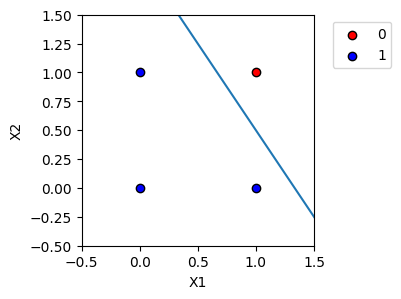

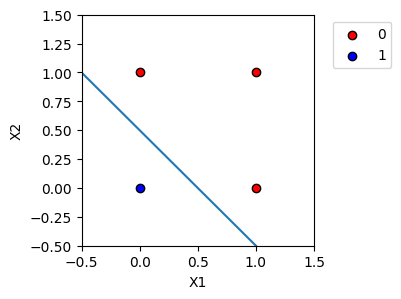

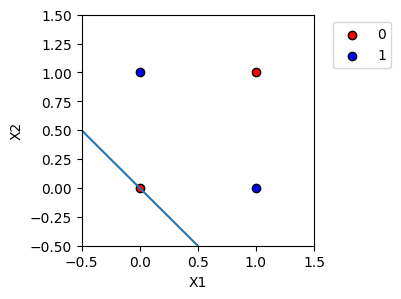

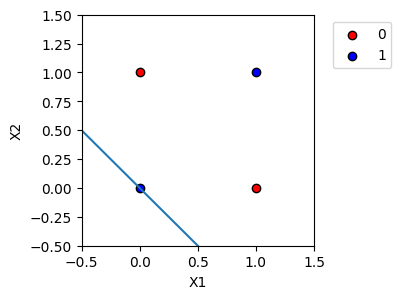

In [6]:
# plot_decision_boundary(x_pre[0][:,1:],y_nand.T,w_trained.T)
y = (y_nand,y_nor,y_xor,y_xnor)
for i in range(4):
    w_trained = pta(x_pre[i])
    plot_decision_boundary(x,y[i].T,w_trained.T)


In [7]:
def sigmoid(a):
    return 1/(1+np.exp(-1*a))
print(sigmoid(9))

0.9998766054240137


In [8]:
def pta2(x, lr, loss, epochs):
    w = np.random.random(np.shape(x)[1]) # make it random
    for i in range(epochs):
        a = np.matmul(w, x.T)
        a = a.reshape(-1,1)
        y_pred = sigmoid(a)

        if loss == "BCE":
            delta_w = np.sum((y_pred-1)*x,axis=0) * lr # check axis along which we should take sum
        elif loss == "MSE":
            delta_w = np.sum((1-y_pred)*(y_pred)*(1-y_pred)*x,axis=0) * lr * (-2) # check axis along which we should take sum
        
        w = w - delta_w
        
    return w

w_trained = pta2(x_pre[2], 0.01, "BCE", 10000)

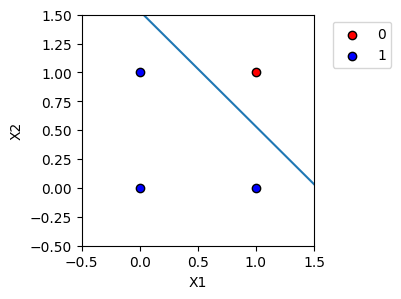

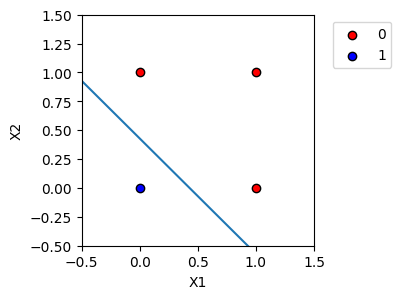

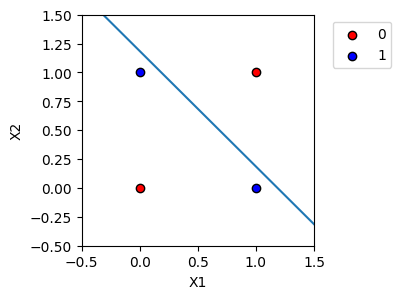

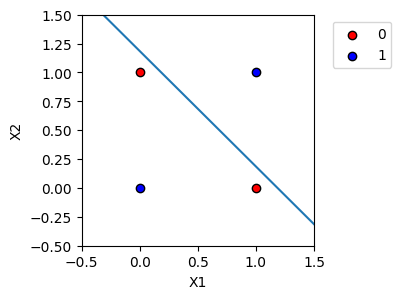

In [9]:

for i in range(4):
    w_trained = pta2(x_pre[i],0.01,"BCE",10000)
    plot_decision_boundary(x,y[i].T,w_trained.T)